In [1]:
# importing necessary modules for analysis

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing csv and combining all the csv files into one call all_data

df = pd.read_csv('/kaggle/input/sales-dataset/Sales_April_2019.csv')

files = [file for file in os.listdir('/kaggle/input/sales-dataset')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('/kaggle/input/sales-dataset/'+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)

In [3]:
all_data = pd.read_csv("all_data.csv")

In [4]:
all_data.columns.str.replace(" ","_").str.lower()
all_data.columns = ['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address']


In [5]:
# dropping all nan values in the dataset

nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

all_data = all_data.dropna(how='all')
all_data.isnull().sum()

order_id            0
product             0
quantity_ordered    0
price_each          0
order_date          0
purchase_address    0
dtype: int64

In [6]:
all_data = all_data[all_data['order_date'].str[0:2] != 'Or']

In [7]:
# adding a month column to the dataset, and converting the new month column into an 'int' dtype

all_data['month'] = all_data['order_date'].str[0:2]
all_data['month'] = all_data['month'].astype(int)
all_data.dtypes

order_id            object
product             object
quantity_ordered    object
price_each          object
order_date          object
purchase_address    object
month                int64
dtype: object

In [8]:
# converting quantity_ordered into int data type and price_each column into float data type

all_data['quantity_ordered'] = pd.to_numeric(all_data['quantity_ordered'])
all_data['price_each'] = pd.to_numeric(all_data['price_each'])
all_data.dtypes

order_id             object
product              object
quantity_ordered      int64
price_each          float64
order_date           object
purchase_address     object
month                 int64
dtype: object

In [9]:
# adding a sales column to the dataset

all_data['sales'] = all_data['quantity_ordered'] * all_data['price_each']

In [10]:
all_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


In [11]:
# grouping dataset by month and looking at the sales 

results = all_data.groupby('month').sum()
results

,quantity_ordered,price_each,sales
month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


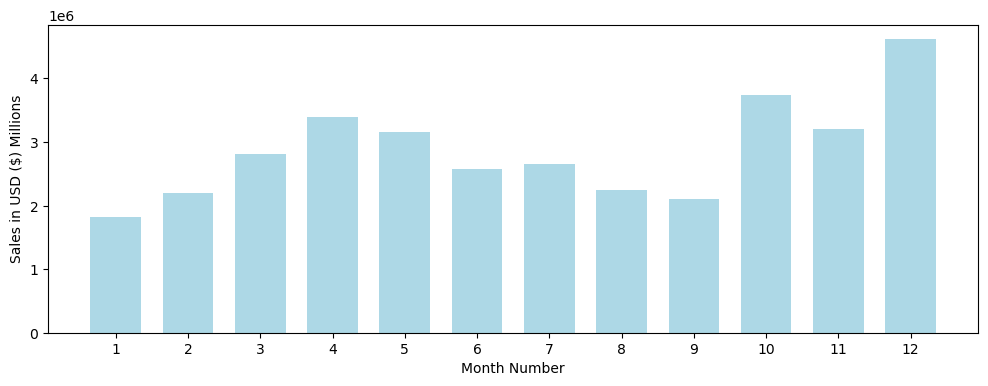

In [12]:
# showing a bar chart of which months had the highest sales

months = range(1,13)

plt.figure(figsize=(12,4))

plt.bar(months,results['sales'], color='lightblue', width=.7)
plt.xticks(months)
plt.ylabel('Sales in USD ($) Millions')
plt.xlabel('Month Number')
plt.show()


In [13]:
# adding a "city" column to the dataframe with the corresponding state in brackets in the same column
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['city'] = all_data['purchase_address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

#all_data['city'] = all_data['purchase_address'].apply(lambda x: x.split(',')[1])
#all_data['city'].value_counts()


,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle (WA)
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas (TX)
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland (OR)
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles (CA)
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City (NY)


In [14]:
results = all_data.groupby('city').sum()
results


,quantity_ordered,price_each,month,sales
city,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


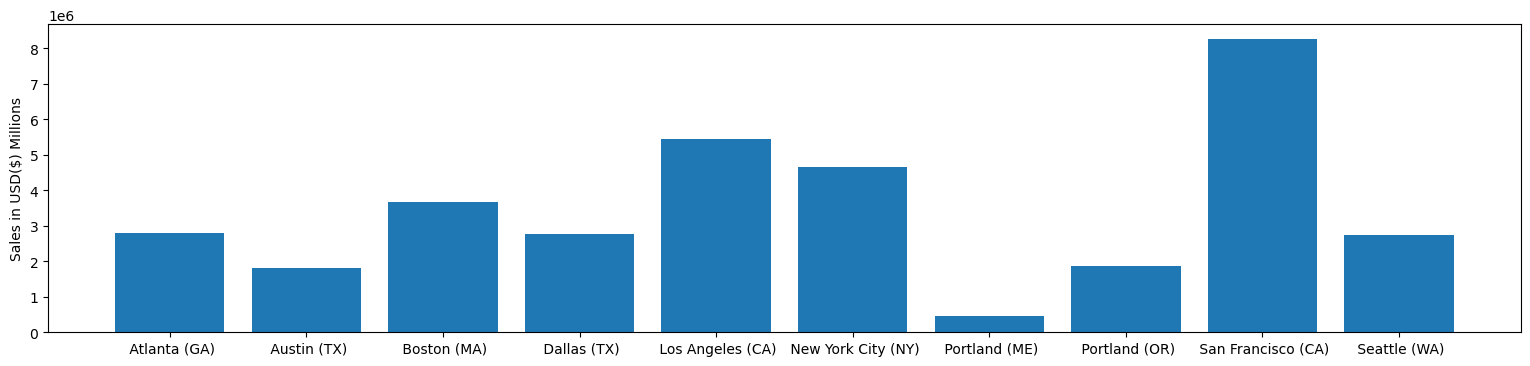

In [15]:
# plotting a bar graph showing the cities with the highest sales

plt.rcParams['figure.figsize']=(19,4)

cities = [city for city, df in all_data.groupby('city')]

plt.bar(cities, results['sales'])
#plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel("Sales in USD($) Millions")
plt.show()


#### What time should we display advertisements to maximize likelihood of customers buying product?

In [16]:
# convert order_date column into a datetime data type

all_data['order_date'] = pd.to_datetime(all_data['order_date'])

In [17]:
# adding hour and minute columns to the dataframe

all_data['hour'] = all_data['order_date'].dt.hour
all_data['minute'] = all_data['order_date'].dt.minute
all_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,hour,minute
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle (WA),22,21
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas (TX),15,11
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,Portland (OR),14,40
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles (CA),20,59
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.68,New York City (NY),19,53


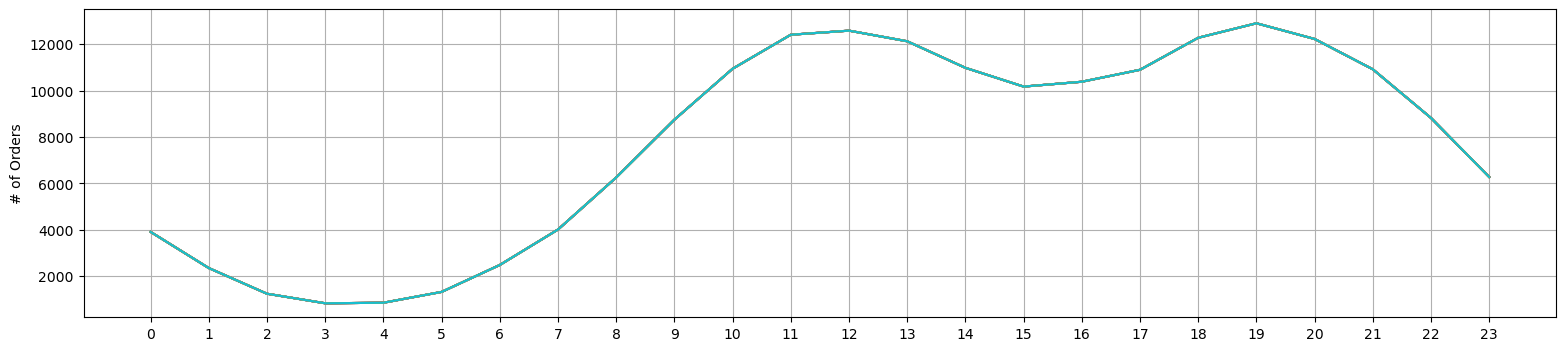

<Figure size 1200x400 with 0 Axes>

In [18]:
# plotting line chart to show the orders and what time they appear

hours = [hour for hour, df in all_data.groupby('hour')]

plt.plot(hours, all_data.groupby(['hour']).count())
plt.xticks(hours)
plt.grid()
plt.ylabel("# of Orders")
plt.figure(figsize=(12,4))
plt.show()

# chart shows the peak time of orders is around 11am or 7pm (19)

## What products are most often sold together?

In [19]:
# creating a grouped column where the products are sold within the same order_id

df = all_data[all_data['order_id'].duplicated(keep=False)]
df['grouped'] = df.groupby('order_id')['product'].transform(lambda x: " , ".join(x))

df = df[['order_id', 'grouped']].drop_duplicates()

df.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,order_id,grouped
46,236716,"AA Batteries (4-pack) , USB-C Charging Cable"
60,236729,"iPhone , Apple Airpods Headphones"
62,236730,"Google Phone , Wired Headphones"
132,236799,"Google Phone , Wired Headphones"
163,236829,"Vareebadd Phone , USB-C Charging Cable"


In [20]:
# showing that iphone and lighting charger cable is the most common items purchased together

from itertools import combinations
from collections import Counter

count = Counter()

for row in df['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone ', ' Lightning Charging Cable') 886
('Google Phone ', ' USB-C Charging Cable') 859
('iPhone ', ' Wired Headphones') 443
('Google Phone ', ' Wired Headphones') 405
('iPhone ', ' Apple Airpods Headphones') 329
('Vareebadd Phone ', ' USB-C Charging Cable') 312
('Google Phone ', ' Bose SoundSport Headphones') 192
('Vareebadd Phone ', ' Wired Headphones') 140
('Google Phone ', ' USB-C Charging Cable ') 128
('iPhone ', ' Lightning Charging Cable ') 119


## What product sold the most? Why do you think it sold the most?

In [21]:
all_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,hour,minute
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle (WA),22,21
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas (TX),15,11
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,Portland (OR),14,40
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles (CA),20,59
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.68,New York City (NY),19,53


In [22]:
product_group = all_data.groupby('product')
quantity_ordered = product_group.sum()['quantity_ordered']

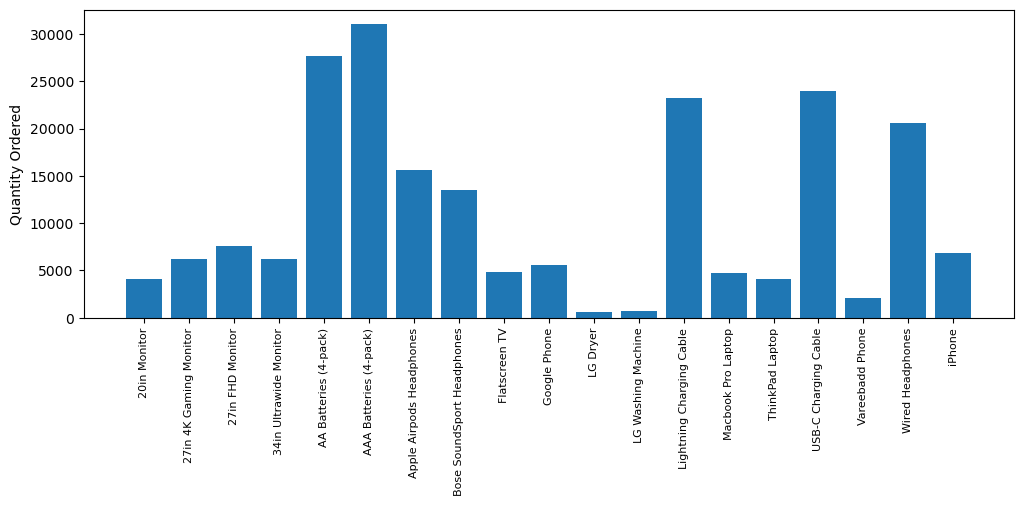

In [23]:
# bar plot showing aaa batteries sold the most 

plt.figure(figsize=(12,4))

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.show()

In [24]:
# showing the average prices of the products

prices = all_data.groupby('product').mean()['price_each']
prices

product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: price_each, dtype: float64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == "":


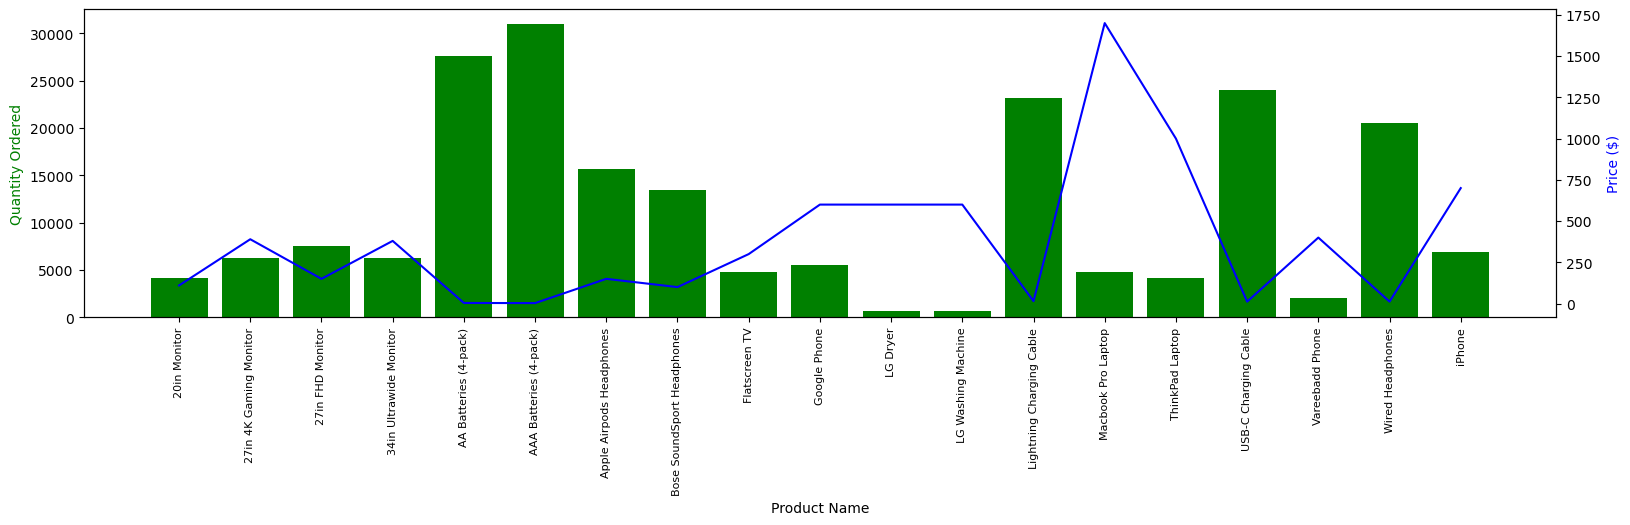

In [25]:
# adding a subplot of prices on the graph and correlating it with the quantity ordered of the products

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

